# p.225

## 한국복지패널 데이터
- 한국보건사회연구원에서 우리나라 가구의 경제활동을 연구해 복지 정책에 반영할 목적으로 발간한 자료
- 전국 7천여 가구를 선정해서 2006년도부터 2019년도까지 조사한 자료

In [1]:
# 데이터 분석에 필요한 라이브러리 로딩
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
welfare = pd.read_csv('welfare.csv') # 한글 x -> 인코딩할 필요 X
welfare

,Unnamed: 0,gender,birth,marriage,religion,income,code_job,code_region
0,0,2.0,1945.0,2.0,1.0,NaN,NaN,1.0
1,1,1.0,1948.0,2.0,2.0,NaN,NaN,1.0
2,2,1.0,1942.0,3.0,1.0,107.0,762.0,1.0
3,3,1.0,1962.0,1.0,1.0,192.0,855.0,1.0
4,4,2.0,1963.0,1.0,1.0,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...
14413,14413,2.0,1967.0,1.0,1.0,NaN,NaN,5.0
14414,14414,2.0,1992.0,5.0,1.0,NaN,NaN,5.0
14415,14415,1.0,1995.0,5.0,1.0,NaN,910.0,5.0
14416,14416,2.0,1998.0,5.0,1.0,200.0,246.0,5.0


In [3]:
welfare['Unnamed: 0']

0            0
1            1
2            2
3            3
4            4
         ...  
14413    14413
14414    14414
14415    14415
14416    14416
14417    14417
Name: Unnamed: 0, Length: 14418, dtype: int64

In [4]:
welfare=welfare.drop(labels='Unnamed: 0', axis=1)
welfare

,gender,birth,marriage,religion,income,code_job,code_region
0,2.0,1945.0,2.0,1.0,NaN,NaN,1.0
1,1.0,1948.0,2.0,2.0,NaN,NaN,1.0
2,1.0,1942.0,3.0,1.0,107.0,762.0,1.0
3,1.0,1962.0,1.0,1.0,192.0,855.0,1.0
4,2.0,1963.0,1.0,1.0,NaN,NaN,1.0
...,...,...,...,...,...,...,...
14413,2.0,1967.0,1.0,1.0,NaN,NaN,5.0
14414,2.0,1992.0,5.0,1.0,NaN,NaN,5.0
14415,1.0,1995.0,5.0,1.0,NaN,910.0,5.0
14416,2.0,1998.0,5.0,1.0,200.0,246.0,5.0


In [5]:
# 복지데이터 정보 확인
welfare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14418 entries, 0 to 14417
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   gender       14418 non-null  float64
 1   birth        14418 non-null  float64
 2   marriage     14418 non-null  float64
 3   religion     14418 non-null  float64
 4   income       4534 non-null   float64
 5   code_job     6878 non-null   float64
 6   code_region  14418 non-null  float64
dtypes: float64(7)
memory usage: 788.6 KB


In [6]:
# 데이터 안에 결측치가 몇 개 있는지 파악
welfare.isnull().sum()

gender            0
birth             0
marriage          0
religion          0
income         9884
code_job       7540
code_region       0
dtype: int64

### 데이터 전처리

In [7]:
# 데이터 전처리를 하기 전에 기존의 데이터가 손상되지 않도록 복사본 생성
welfare_copy=welfare.copy()
welfare = welfare_copy.copy()
welfare

,gender,birth,marriage,religion,income,code_job,code_region
0,2.0,1945.0,2.0,1.0,NaN,NaN,1.0
1,1.0,1948.0,2.0,2.0,NaN,NaN,1.0
2,1.0,1942.0,3.0,1.0,107.0,762.0,1.0
3,1.0,1962.0,1.0,1.0,192.0,855.0,1.0
4,2.0,1963.0,1.0,1.0,NaN,NaN,1.0
...,...,...,...,...,...,...,...
14413,2.0,1967.0,1.0,1.0,NaN,NaN,5.0
14414,2.0,1992.0,5.0,1.0,NaN,NaN,5.0
14415,1.0,1995.0,5.0,1.0,NaN,910.0,5.0
14416,2.0,1998.0,5.0,1.0,200.0,246.0,5.0


In [8]:
# 데이터 이상치 있는지 여부 확인
welfare['gender'].value_counts() # 이상치가 없다 !

# 1 -> man, 2 -> woman

gender
2.0    7913
1.0    6505
Name: count, dtype: int64

In [9]:
welfare['gender'] == 1.0 # --> 남자 = 'male'

welfare['gender']=np.where(welfare['gender'] == 1.0,'male','female') #replace 함수와 비슷한 기능
welfare

,gender,birth,marriage,religion,income,code_job,code_region
0,female,1945.0,2.0,1.0,NaN,NaN,1.0
1,male,1948.0,2.0,2.0,NaN,NaN,1.0
2,male,1942.0,3.0,1.0,107.0,762.0,1.0
3,male,1962.0,1.0,1.0,192.0,855.0,1.0
4,female,1963.0,1.0,1.0,NaN,NaN,1.0
...,...,...,...,...,...,...,...
14413,female,1967.0,1.0,1.0,NaN,NaN,5.0
14414,female,1992.0,5.0,1.0,NaN,NaN,5.0
14415,male,1995.0,5.0,1.0,NaN,910.0,5.0
14416,female,1998.0,5.0,1.0,200.0,246.0,5.0


In [14]:
welfare['gender'].isna()

0        False
1        False
2        False
3        False
4        False
         ...  
14413    False
14414    False
14415    False
14416    False
14417    False
Name: gender, Length: 14418, dtype: bool

In [13]:
# 결측치 확인
welfare['gender'].isna().sum()

0

<Axes: xlabel='gender', ylabel='count'>

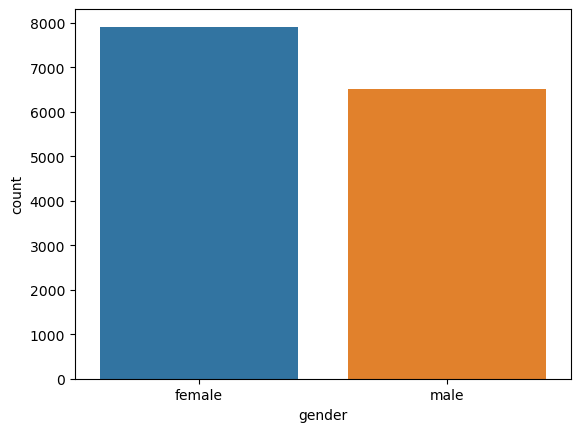

In [16]:
# 새로운 시각화 라이브러리 seaborn 불러오기
import seaborn as sns
# seaborn : matplotlib보다 쉽고 간편하게 사용 가능. 단, 자세한 그래프를 그리기 어렵다.
sns.countplot(data = welfare, x='gender')
# countplot(데이터 설명) : 카테고리별 데이터의 개수를 바로 세어주는 함수

# 1. 결혼여부, 종교여부 이상치 확인하고 데이터 변경

### 종교 여부 이상치 확인

- 종교가 있으면 yes, 없으면 no로 변경
- 1 : 있음
- 2 : 없음

In [21]:
welfare['religion'].value_counts().sort_index()

religion
1.0    6603
2.0    7815
Name: count, dtype: int64

In [23]:
welfare['religion'] = np.where(welfare['religion'] == 1, 'yes', 'no')
welfare

,gender,birth,marriage,religion,income,code_job,code_region
0,female,1945.0,2.0,yes,NaN,NaN,1.0
1,male,1948.0,2.0,no,NaN,NaN,1.0
2,male,1942.0,3.0,yes,107.0,762.0,1.0
3,male,1962.0,1.0,yes,192.0,855.0,1.0
4,female,1963.0,1.0,yes,NaN,NaN,1.0
...,...,...,...,...,...,...,...
14413,female,1967.0,1.0,yes,NaN,NaN,5.0
14414,female,1992.0,5.0,yes,NaN,NaN,5.0
14415,male,1995.0,5.0,yes,NaN,910.0,5.0
14416,female,1998.0,5.0,yes,200.0,246.0,5.0


In [25]:
welfare['religion'].isna().sum() # 결측치 확인

0

In [26]:
welfare['religion'].value_counts().sort_index()

religion
no     7815
yes    6603
Name: count, dtype: int64

<Axes: xlabel='religion', ylabel='count'>

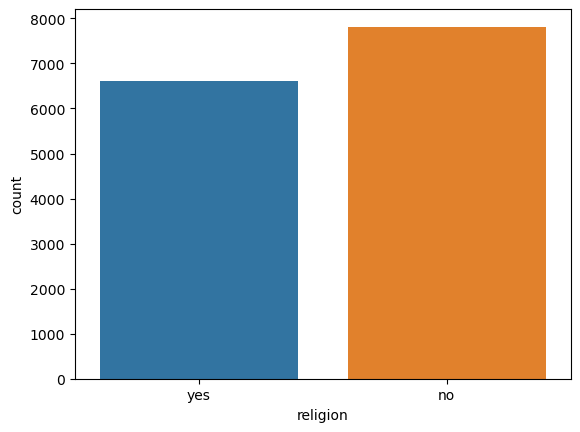

In [27]:
sns.countplot(data=welfare, x='religion')

In [30]:
# marriage : 결혼 여부를 묻는 컬럼
welfare['marriage'].value_counts().sort_index()

marriage
0.0    2121
1.0    7190
2.0    1954
3.0     689
4.0      78
5.0    2357
6.0      29
Name: count, dtype: int64

### 결혼 데이터 정보
 - 0 : 미해당(18세 미만)
 - 1 : 기혼
 - 2 : 사별
 - 3 : 이혼
 - 4 : 별거
 - 5 : 미혼
 - 6 : 기타

### 결혼, 이혼, 기타 3분류로 바꿔보기

In [31]:
def getMarriage(row): # 함수정의
    marriage = row['marriage']
    # 조건문을 통해서 1번 = 'marriage', 3번 = 'divorce', 5번 = 'not marriage', 나머지 = 'etc'
    if marriage == 1:
        return 'marriage'
    elif marriage == 3:
        return 'divorce'
    elif marriage == 5:
        return 'not marriage'
    else:
        return 'etc'

In [36]:
welfare['marriage'] = welfare.apply(getMarriage, axis=1)
# apply(함수 이름) : 함수를 행단위 or 열단위로 요소별 적용시켜주는 함수
welfare

,gender,birth,marriage,religion,income,code_job,code_region
0,female,1945.0,etc,yes,NaN,NaN,1.0
1,male,1948.0,etc,no,NaN,NaN,1.0
2,male,1942.0,divorce,yes,107.0,762.0,1.0
3,male,1962.0,marriage,yes,192.0,855.0,1.0
4,female,1963.0,marriage,yes,NaN,NaN,1.0
...,...,...,...,...,...,...,...
14413,female,1967.0,marriage,yes,NaN,NaN,5.0
14414,female,1992.0,not marriage,yes,NaN,NaN,5.0
14415,male,1995.0,not marriage,yes,NaN,910.0,5.0
14416,female,1998.0,not marriage,yes,200.0,246.0,5.0


<Axes: xlabel='marriage', ylabel='count'>

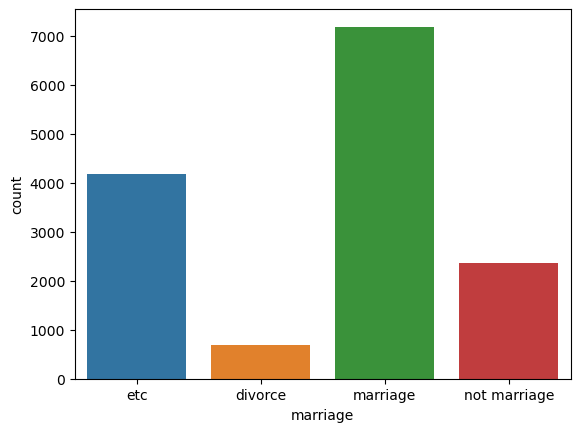

In [37]:
sns.countplot(data=welfare, x='marriage')

## 종교 유무에 따른 이혼율 표 만들기

In [38]:
welfare

,gender,birth,marriage,religion,income,code_job,code_region
0,female,1945.0,etc,yes,NaN,NaN,1.0
1,male,1948.0,etc,no,NaN,NaN,1.0
2,male,1942.0,divorce,yes,107.0,762.0,1.0
3,male,1962.0,marriage,yes,192.0,855.0,1.0
4,female,1963.0,marriage,yes,NaN,NaN,1.0
...,...,...,...,...,...,...,...
14413,female,1967.0,marriage,yes,NaN,NaN,5.0
14414,female,1992.0,not marriage,yes,NaN,NaN,5.0
14415,male,1995.0,not marriage,yes,NaN,910.0,5.0
14416,female,1998.0,not marriage,yes,200.0,246.0,5.0


In [52]:
r_g=welfare.groupby('religion', as_index = False)['marriage'].value_counts(normalize=True)
# groupby : 같은 요소끼리 그룹화
# 각 데이터별 비율을 나타내주는 속성 normalize = True
# as_index = False : religion으로 그룹화 한 후 인덱스를 숫자로 다시 메겨주겠다!
r_g

,religion,marriage,proportion
0,no,marriage,0.468330
1,no,etc,0.290723
2,no,not marriage,0.191811
3,no,divorce,0.049136
4,yes,marriage,0.534605
5,yes,etc,0.289262
6,yes,not marriage,0.129941
7,yes,divorce,0.046191


In [53]:
prop = r_g[(r_g['marriage'] == 'marriage') | (r_g['marriage'] == 'divorce')] # 불리언 인덱싱
prop

,religion,marriage,proportion
0,no,marriage,0.468330
3,no,divorce,0.049136
4,yes,marriage,0.534605
7,yes,divorce,0.046191


In [54]:
a = (prop['proportion'] * 100).round(1)
a

0    46.8
3     4.9
4    53.5
7     4.6
Name: proportion, dtype: float64

In [55]:
prop['proprotion'] = a
prop

C:\Users\smhrd\AppData\Local\Temp\ipykernel_15164\2557834338.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prop['proprotion'] = a


,religion,marriage,proportion,proprotion
0,no,marriage,0.468330,46.8
3,no,divorce,0.049136,4.9
4,yes,marriage,0.534605,53.5
7,yes,divorce,0.046191,4.6


<Axes: xlabel='religion', ylabel='proportion'>

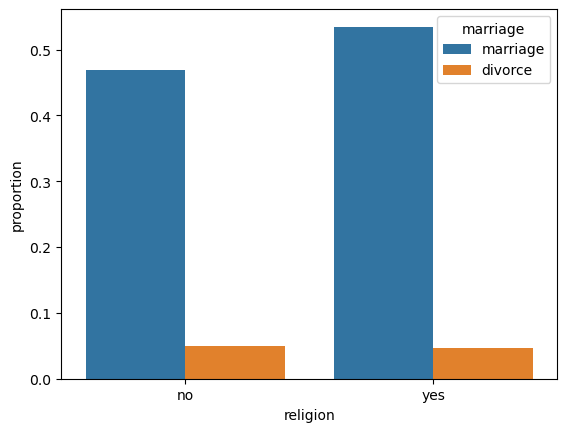

In [57]:
# hue : 색깔이라는 뜻을 가진 단어로, 바 그래프에서 데이터가 각각 어떤 값인지 구분해주는 기능
sns.barplot(data=prop, x='religion', y='proportion', hue='marriage')

## 얻을 수 있는 인사이트는 ?
 - 종교와 이혼율은 크게 상관이 없다 !

In [58]:
# 여기서부터는 참고 !

In [59]:
# query() --> 데이터베이스 where절에 들어갈 조건문 쿼리를 가져다 사용할 수 있는 함수
temp=welfare.query('marriage == "marriage" or marriage=="divorce"').groupby('religion', as_index=False)['marriage'].value_counts(normalize=True)
temp

,religion,marriage,proportion
0,no,marriage,0.905045
1,no,divorce,0.094955
2,yes,marriage,0.920469
3,yes,divorce,0.079531


In [60]:
temp['proportion'] = (temp['proportion'] * 100).round(1)
temp

,religion,marriage,proportion
0,no,marriage,90.5
1,no,divorce,9.5
2,yes,marriage,92.0
3,yes,divorce,8.0


<Axes: xlabel='religion', ylabel='proportion'>

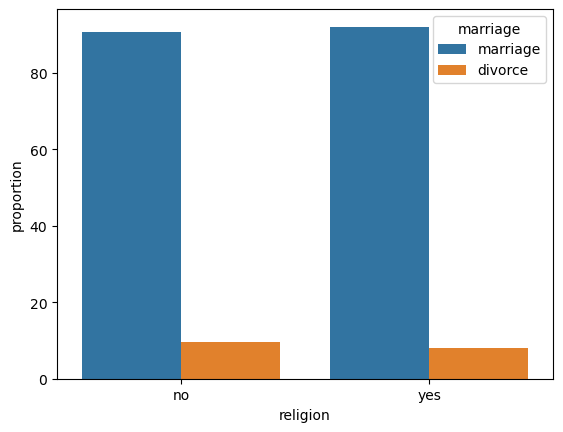

In [62]:
sns.barplot(data=temp, x='religion', y='proportion', hue='marriage')

## 2. 성별에 따른 수입 확인하기

In [65]:
# decribe() 함수 : 수치형 변수들만을 기준으로
# 카운트, 평균, 표준편차, 최소/최댓값, 25%, 50%, 75%, 값을 각각 구해줌 -> 수치해석 함수
welfare['income'].describe()

count    4534.000000
mean      268.455007
std       198.021206
min         0.000000
25%       150.000000
50%       220.000000
75%       345.750000
max      1892.000000
Name: income, dtype: float64

In [66]:
welfare['income'].isna().sum() # 결측치 확인

9884

#### min값을 바탕으로 0원이라는 이상치, 9884개의 결측치 확인

In [67]:
# query() 함수 사용하기
# income이라는 컬럼 값이 0인 튜플만 출력
# SELECT * FROM welfare WHERE income=0
welfare.query('income==0')

,gender,birth,marriage,religion,income,code_job,code_region
4715,female,1983.0,marriage,no,0.0,311.0,5.0
6347,female,1983.0,marriage,yes,0.0,252.0,1.0
6632,female,1991.0,not marriage,yes,0.0,313.0,2.0
10487,female,1980.0,marriage,no,0.0,311.0,3.0
10620,female,1985.0,marriage,yes,0.0,320.0,3.0
10818,female,1981.0,marriage,yes,0.0,243.0,3.0
13654,female,1978.0,marriage,yes,0.0,252.0,6.0


#### 수입이 0원으로 되어있는 총 7개의 데이터를 확인!
 - code_job을 바탕으로 직업이 있는 것으로 판단되나 수입이 없다.

In [69]:
job_code = pd.read_csv('job_code.csv', encoding = 'euc-kr')
job_code

,code_job,job
0,111,의회 의원?고위 공무원 및 공공단체 임원
1,112,기업 고위 임원
2,121,행정 및 경영 지원 관리자
3,122,마케팅 및 광고?홍보 관리자
4,131,연구?교육 및 법률 관련 관리자
...,...,...
151,992,계기?자판기 및 주차 관리 종사자
152,999,기타 서비스 관련 단순 종사자
153,1001,장교
154,1002,부사관


In [74]:
# 311, 252, 313, 320, 243 데이터가 어떤 직업을 가지고 있는지 query() 함수로 불러와보자
job_code.query('code_job==243 or code_job == 252 or code_job == 311 or code_job == 313 or code_job == 320')

,code_job,job
35,243,간호사
42,252,학교 교사
60,311,행정 사무원
62,313,회계 및 경리 사무원
64,320,금융 사무 종사자


In [76]:
# code_job이 252인 데이터
welfare.query('code_job == 252')

,gender,birth,marriage,religion,income,code_job,code_region
409,male,1982.0,marriage,no,450.0,252.0,1.0
577,female,1973.0,marriage,yes,525.0,252.0,2.0
735,female,1978.0,marriage,yes,510.0,252.0,1.0
894,female,1975.0,marriage,no,508.0,252.0,1.0
897,female,1979.0,marriage,no,400.0,252.0,7.0
...,...,...,...,...,...,...,...
13644,female,1985.0,not marriage,no,458.0,252.0,3.0
13654,female,1978.0,marriage,yes,0.0,252.0,6.0
13655,male,1977.0,marriage,yes,499.0,252.0,6.0
13883,male,1964.0,marriage,no,759.0,252.0,5.0


#### 7명의 직업이 제대로 존재한다 그럼에도 불구하고 데이터에 오류!

#### 데이터 오류 해결방법 2가지
 - 1. 이상치 채워주기 (예 - 해당 직업의 평균 연봉, 중간값 넣어주기)
 - 2. 이상치 버려주기 (주로 이상치 데이터를 삭제해도 무관할때)

In [81]:
welfare[welfare['income'].isna()] # 결측치 데이터 확인

,gender,birth,marriage,religion,income,code_job,code_region
0,female,1945.0,etc,yes,NaN,NaN,1.0
1,male,1948.0,etc,no,NaN,NaN,1.0
4,female,1963.0,marriage,yes,NaN,NaN,1.0
5,female,2003.0,etc,yes,NaN,NaN,1.0
6,male,1927.0,marriage,yes,NaN,NaN,1.0
...,...,...,...,...,...,...,...
14412,male,1967.0,marriage,yes,NaN,874.0,5.0
14413,female,1967.0,marriage,yes,NaN,NaN,5.0
14414,female,1992.0,not marriage,yes,NaN,NaN,5.0
14415,male,1995.0,not marriage,yes,NaN,910.0,5.0


In [82]:
# 결측치가 아닌 데이터
welfare[welfare['income'].notna()]

,gender,birth,marriage,religion,income,code_job,code_region
2,male,1942.0,divorce,yes,107.0,762.0,1.0
3,male,1962.0,marriage,yes,192.0,855.0,1.0
7,female,1934.0,marriage,yes,27.0,941.0,1.0
8,female,1940.0,etc,yes,27.0,999.0,2.0
14,male,1978.0,marriage,no,338.0,312.0,1.0
...,...,...,...,...,...,...,...
14401,male,1966.0,marriage,yes,280.0,874.0,6.0
14402,female,1962.0,marriage,yes,209.0,930.0,6.0
14405,female,1947.0,etc,no,27.0,941.0,6.0
14410,male,1956.0,marriage,yes,200.0,854.0,6.0


In [83]:
# 직업이 있음에도 수입을 적지 않은 사람을 보려면?
# 즉, 결측치를 제거할 때 수입과 직업이 동시에 NULL인 사람을 제거!
welfare.query('income.isna() and code_job.isna()')

,gender,birth,marriage,religion,income,code_job,code_region
0,female,1945.0,etc,yes,NaN,NaN,1.0
1,male,1948.0,etc,no,NaN,NaN,1.0
4,female,1963.0,marriage,yes,NaN,NaN,1.0
5,female,2003.0,etc,yes,NaN,NaN,1.0
6,male,1927.0,marriage,yes,NaN,NaN,1.0
...,...,...,...,...,...,...,...
14407,male,1933.0,marriage,no,NaN,NaN,6.0
14409,female,1934.0,etc,yes,NaN,NaN,6.0
14413,female,1967.0,marriage,yes,NaN,NaN,5.0
14414,female,1992.0,not marriage,yes,NaN,NaN,5.0


In [88]:
# 수입과 직업코드가 동시에 NULL인 값만 제거(drop())
ind = welfare[(welfare['income'].isna()) & (welfare['code_job'].isna())].index
ind

Index([    0,     1,     4,     5,     6,     9,    10,    11,    12,    13,
       ...
       14397, 14400, 14403, 14404, 14406, 14407, 14409, 14413, 14414, 14417],
      dtype='int64', length=7540)

In [92]:
welfare_drop = welfare.drop(ind)
welfare_drop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6878 entries, 2 to 14416
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   gender       6878 non-null   object 
 1   birth        6878 non-null   float64
 2   marriage     6878 non-null   object 
 3   religion     6878 non-null   object 
 4   income       4534 non-null   float64
 5   code_job     6878 non-null   float64
 6   code_region  6878 non-null   float64
dtypes: float64(4), object(3)
memory usage: 429.9+ KB


In [97]:
# 인덱스 번호 정리
welfare_drop.index = range(1,len(welfare_drop)+1) # (1,2,3, ...) 데이터의 길이만큼
welfare

,gender,birth,marriage,religion,income,code_job,code_region
0,female,1945.0,etc,yes,NaN,NaN,1.0
1,male,1948.0,etc,no,NaN,NaN,1.0
2,male,1942.0,divorce,yes,107.0,762.0,1.0
3,male,1962.0,marriage,yes,192.0,855.0,1.0
4,female,1963.0,marriage,yes,NaN,NaN,1.0
...,...,...,...,...,...,...,...
14413,female,1967.0,marriage,yes,NaN,NaN,5.0
14414,female,1992.0,not marriage,yes,NaN,NaN,5.0
14415,male,1995.0,not marriage,yes,NaN,910.0,5.0
14416,female,1998.0,not marriage,yes,200.0,246.0,5.0


In [98]:
welfare_drop['income'].describe()

count    4534.000000
mean      268.455007
std       198.021206
min         0.000000
25%       150.000000
50%       220.000000
75%       345.750000
max      1892.000000
Name: income, dtype: float64

In [101]:
welfare_drop['code_job']
welfare_drop['income'] # 두 개 데이터만 가지고 새로운 데이터프레임 생성
code_income_median = welfare_drop[['code_job', 'income']].groupby('code_job').median() 
#median() : 중간값을 구해주는 함수
code_income_median

,income
code_job,
111.0,461.0
112.0,465.0
121.0,754.0
122.0,467.5
131.0,566.5
...,...
992.0,183.0
999.0,27.0
1001.0,572.0


In [104]:
code_income_median[code_income_median['income'].isna()] # 결측치 확인
# 불리언 인덱싱을 통해서 수입이 NULL값인 잡코드만 출력

,income
code_job,
423.0,NaN
613.0,NaN
823.0,NaN


In [107]:
# 사용자 정의함수 사용해서 income 컬럼의 결측치 제거
code_income_median.loc[welfare_drop['code_job']].values[0] # 데이터프레임 인덱싱 -> 열

array([303.])

In [108]:
# 사용자 정의함수 --> income(수입) 값이 결측치인지 아닌지
def fill_income(row): # income의 결측치를 제거해주는 함수
    # 수입 값이 결측치일 때 !
    if np.isnan(row['income']): # 연산의 속도를 위해 numpy 라이브러리 사용
        return code_income_median.loc[row['code_job']].values[0]
                # 수입 값이 결측치라면, 그 직업의 중간값을 대입
    else:     # 수입 값이 결측치가 아닐 때
        return row['income']

In [112]:
# 함수 적용
welfare_drop['income'] = welfare_drop.apply(fill_income, axis = 1)
welfare_drop[welfare_drop['income'].isnull()]
# 함수를 적용하고나면 null값이 없어야 하는것 아닌가 ?

,gender,birth,marriage,religion,income,code_job,code_region
239,male,1966.0,marriage,no,NaN,823.0,1.0
240,female,1966.0,marriage,no,NaN,823.0,1.0
713,male,1947.0,marriage,no,NaN,823.0,1.0
714,female,1949.0,marriage,no,NaN,823.0,1.0
718,male,1957.0,marriage,no,NaN,823.0,1.0
719,female,1963.0,marriage,no,NaN,823.0,1.0
769,male,1975.0,marriage,no,NaN,823.0,1.0
1034,male,1959.0,marriage,yes,NaN,823.0,3.0
1066,male,1938.0,marriage,yes,NaN,823.0,3.0
1342,male,1936.0,etc,no,NaN,613.0,4.0


In [113]:
# income 데이터가 NULL이면 해당 직업의 중간값으로 대체하는 작업을 했는데
# 중간값마저도 NULL인 데이터가 존재!
welfare_drop[welfare_drop['income'].isnull()]

,gender,birth,marriage,religion,income,code_job,code_region
239,male,1966.0,marriage,no,NaN,823.0,1.0
240,female,1966.0,marriage,no,NaN,823.0,1.0
713,male,1947.0,marriage,no,NaN,823.0,1.0
714,female,1949.0,marriage,no,NaN,823.0,1.0
718,male,1957.0,marriage,no,NaN,823.0,1.0
719,female,1963.0,marriage,no,NaN,823.0,1.0
769,male,1975.0,marriage,no,NaN,823.0,1.0
1034,male,1959.0,marriage,yes,NaN,823.0,3.0
1066,male,1938.0,marriage,yes,NaN,823.0,3.0
1342,male,1936.0,etc,no,NaN,613.0,4.0


In [114]:
welfare_drop=welfare_drop.dropna(subset = ['income'])
welfare_drop

,gender,birth,marriage,religion,income,code_job,code_region
1,male,1942.0,divorce,yes,107.0,762.0,1.0
2,male,1962.0,marriage,yes,192.0,855.0,1.0
3,female,1934.0,marriage,yes,27.0,941.0,1.0
4,female,1940.0,etc,yes,27.0,999.0,2.0
5,male,1978.0,marriage,no,338.0,312.0,1.0
...,...,...,...,...,...,...,...
6874,male,1956.0,marriage,yes,200.0,854.0,6.0
6875,female,1958.0,marriage,yes,218.0,611.0,6.0
6876,male,1967.0,marriage,yes,338.5,874.0,5.0
6877,male,1995.0,not marriage,yes,260.0,910.0,5.0


In [116]:
welfare_drop[welfare_drop['income'].isnull()].size # 결측치 제거 완료 !

0

In [117]:
# NaN값 이외에 제거해야할 데이터 -> 수입이 0인 데이터
welfare_drop[welfare_drop['income'] == 0].size

49

In [118]:
welfare_drop['income'] = np.where(welfare_drop['income']==0, np.nan, welfare_drop['income'])
welfare_drop['income'].isna().sum() # NULL값 7개 추가

C:\Users\smhrd\AppData\Local\Temp\ipykernel_15164\1483172532.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  welfare_drop['income'] = np.where(welfare_drop['income']==0, np.nan, welfare_drop['income'])


7

In [119]:
# 결측치 최종 제거 - dropna
gender_income = welfare_drop.dropna(subset = ['income'])

In [120]:
gender_income

,gender,birth,marriage,religion,income,code_job,code_region
1,male,1942.0,divorce,yes,107.0,762.0,1.0
2,male,1962.0,marriage,yes,192.0,855.0,1.0
3,female,1934.0,marriage,yes,27.0,941.0,1.0
4,female,1940.0,etc,yes,27.0,999.0,2.0
5,male,1978.0,marriage,no,338.0,312.0,1.0
...,...,...,...,...,...,...,...
6874,male,1956.0,marriage,yes,200.0,854.0,6.0
6875,female,1958.0,marriage,yes,218.0,611.0,6.0
6876,male,1967.0,marriage,yes,338.5,874.0,5.0
6877,male,1995.0,not marriage,yes,260.0,910.0,5.0


In [123]:
gender_income = welfare_drop.groupby('gender', as_index=False).agg(mean_income=('income','mean'))

# agg() => apply() 함수와 비슷한 역할, 여러개의 함수를 한번에 적용할 수 있다는 장점
gender_income

,gender,mean_income
0,female,190.280031
1,male,311.430076


<Axes: xlabel='gender', ylabel='mean_income'>

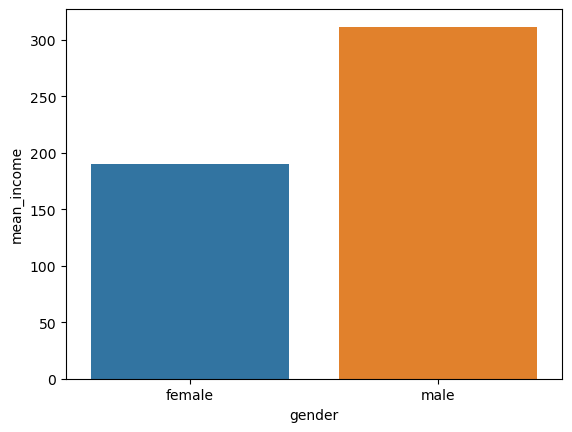

In [124]:
sns.barplot(data=gender_income, x='gender', y='mean_income')

### 우리가 얻은 최종 인사이트 : 남자가 평균적으로 여자보다 수입이 높다